In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import rubin_sim.maf as maf

In [14]:
bundleList = []
plotDict = {}
colmap = maf.batches.ColMapDict("opsimV4")
nside=64
spatial_slicer = maf.slicers.HealpixSlicer
sqls = ['note="twilight_neo"', 'note!="twilight_neo"', 'note="twilight_neo" and night=7']
slicer = spatial_slicer(
        nside=nside,
        latCol=colmap["alt"],
        lonCol=colmap["az"],
        latLonDeg=colmap["raDecDeg"],
        useCache=False,
    )
metric = maf.metrics.CountMetric(
    colmap["mjd"], metricName="Nvisits as function of Alt/Az"
)
plotFuncs = [maf.plots.LambertSkyMap()]

plotDict = {"norm": "log"}
for sql in sqls:
    bundle = maf.metricBundles.MetricBundle(
        metric,
        slicer,
        sql,
        plotFuncs=plotFuncs,
        plotDict=plotDict,
        runName='twilight_neo_nightpattern1v2.1'
    )
    bundleList.append(bundle)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


In [15]:
bd = maf.metricBundles.makeBundlesDictFromList(bundleList)
g = maf.MetricBundleGroup(bd, 'twi_neo_repeat4_z_np1_v2.2_0yrs.db', 'temp')

Querying table None with constraint note="twilight_neo" and night=7 for columns ['rotSkyPos', 'azimuth', 'observationStartMJD', 'altitude']
Found 52 visits
Running:  ['twilight_neo_nightpattern1v2_1_Nvisits_as_function_of_Alt_Az_notetwilight_neo_and_night7_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint note="twilight_neo" for columns ['rotSkyPos', 'azimuth', 'observationStartMJD', 'altitude']
Found 468 visits
Running:  ['twilight_neo_nightpattern1v2_1_Nvisits_as_function_of_Alt_Az_notetwilight_neo_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint note!="twilight_neo" for columns ['rotSkyPos', 'azimuth', 'observationStartMJD', 'altitude']
Found 11572 visits
Running:  ['twilight_neo_nightpattern1v2_1_Nvisits_as_function_of_Alt_Az_note!twilight_neo_HEAL']
Completed metric generation.
Running reduce methods.
Running sum

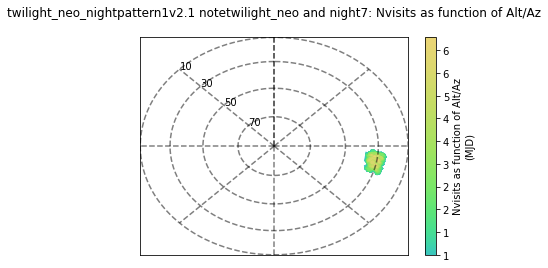

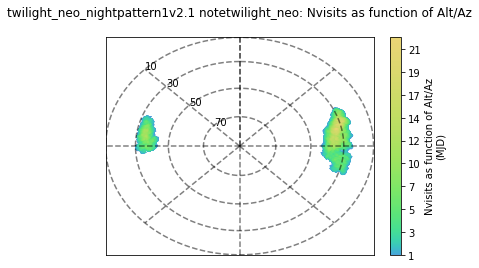

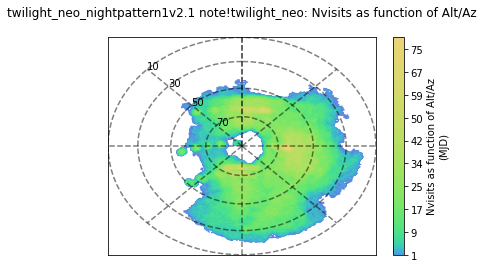

In [16]:
g.runAll()
g.plotAll(closefigs=False)